# Noise Model Diagnostics: Autocorrelation of the Residuals

This example shows how to use the autocorrelation plots of the residuals to check assumptions of the noise model

Three cases are shown. In the first two, optimisation is used to obtain a best-fit parameter vector in a single output problem. In the first case the noise is correctly specified and in the second case the noise is misspecified. The third case demonstrates the same method in a multiple output problem with Bayesian inference.

## Case 1: Correctly specified noise

For the first example, we will use optimisation to obtain the best-fit parameter vector. See [Optimisation First Example](https://github.com/pints-team/pints/blob/master/examples/optimisation-first-example.ipynb) for more details. We begin with a problem in which the noise is correctly specified: both the data generation and the model use independent Gaussian noise.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4515497    0:00.0
1     12     4448412    0:00.0
2     18     4317231    0:00.0
3     24     4317231    0:00.0
20    126    1056122    0:00.0
40    246    247649.6   0:00.0
60    366    247636.1   0:00.0
80    486    247635.4   0:00.1
100   606    247635.4   0:00.1
120   726    247635.4   0:00.1
140   846    247635.4   0:00.1
160   966    247635.4   0:00.1
180   1086   247635.4   0:00.1
200   1206   247635.4   0:00.1
220   1326   247635.4   0:00.1
240   1446   247635.4   0:00.1
260   1566   247635.4   0:00.1
280   1686   247635.4   0:00.2
300   1806   247635.4   0:00.2
320   1926   247635.4   0:00.2
340   2046   247635.4   0:00.2
360   2166   247635.4   0:00.2
367   2202   247635.4   0:00.2
Halting: No significant change for 200 iterations.
Score at true solution: 
255697.17368637378
Found solution:          True paramet

### Visualisation of the data
After obtaining these parameters, it is useful to visualize the data and the fit.

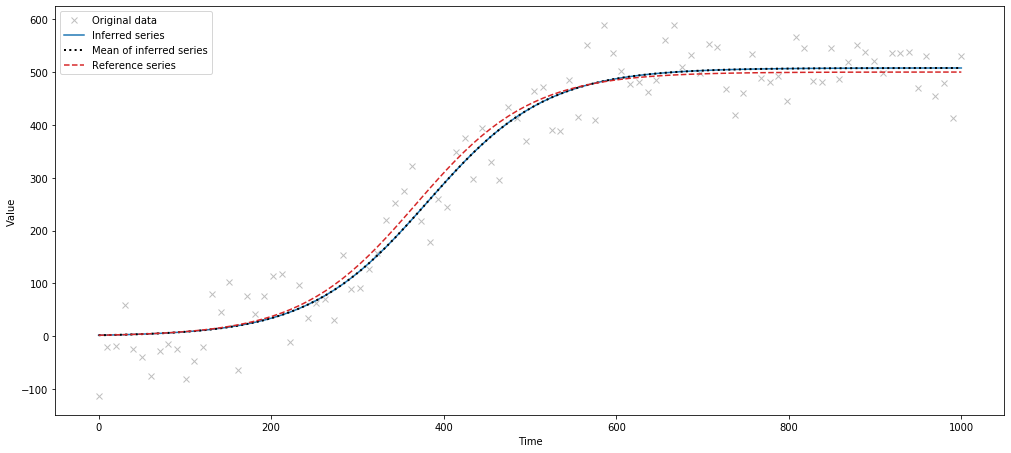

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

### Plotting autocorrelation of the residuals
Next we use the autocorrelation plot of the residuals to evaluate the noise model. This functionality is provided by the `plot_residuals_autocorrelation` method in `pints.residuals_diagnostics`.

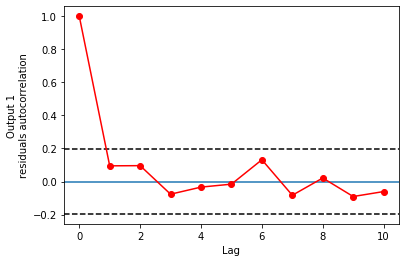

In [3]:
from pints.residuals_diagnostics import plot_residuals_autocorrelation

# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()


The figure shows no significant autocorrelation in the residuals. Therefore, the assumption of independent noise may be valid.

## Case 2: Incorrectly specified noise

For the next case, we generate data with an AR(1) (first order autoregressive) noise model. However, we deliberately misspecify the model and assume independent Gaussian noise (as before) when fitting the parameters.

In [4]:
import pints.noise

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add AR(1) noise
rho = 0.75
sigma = 50
values = org_values + pints.noise.ar1(rho, sigma, len(org_values))

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4925224    0:00.0
1     12     4925224    0:00.0
2     18     4676568    0:00.0
3     24     4637621    0:00.0
20    126    161228.4   0:00.0
40    246    161228.4   0:00.0
60    366    160902.7   0:00.0
80    486    160896.7   0:00.0
100   606    160896.7   0:00.1
120   726    160896.7   0:00.1
140   846    160896.7   0:00.1
160   966    160896.7   0:00.1
180   1086   160896.7   0:00.1
200   1206   160896.7   0:00.1
220   1326   160896.7   0:00.1
240   1446   160896.7   0:00.1
260   1566   160896.7   0:00.1
280   1686   160896.7   0:00.1
300   1806   160896.7   0:00.2
320   1926   160896.7   0:00.2
340   2046   160896.7   0:00.2
360   2166   160896.7   0:00.2
380   2286   160896.7   0:00.2
400   2406   160896.7   0:00.2
420   2526   160896.7   0:00.2
440   2646   160896.7   0:00.2
460   2766   160896.7   0:00.2
480   28

### Visualisation of the data
As before we plot the data and the inferred trajectory.

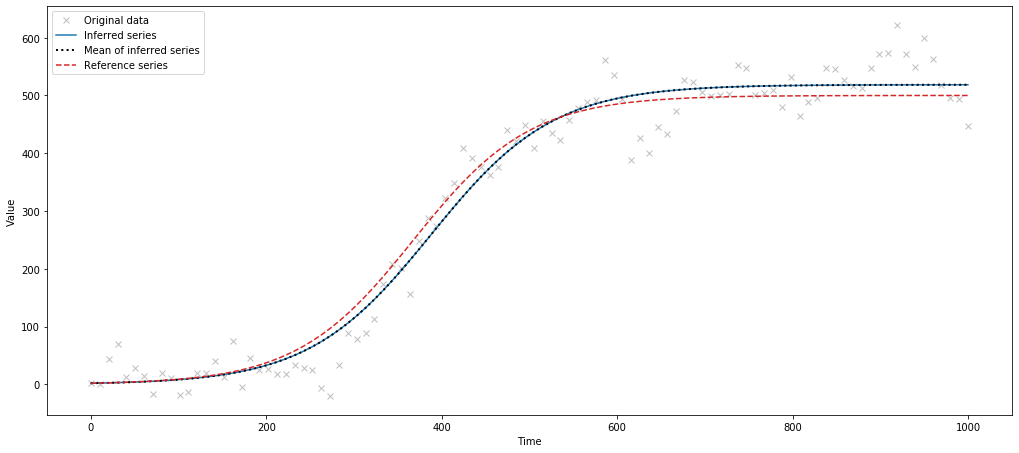

In [5]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

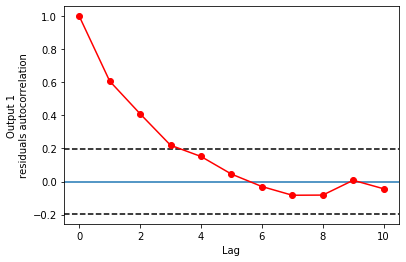

In [6]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()

Now the autocorrelation plot of the residuals shows high autocorrelation at small lags, which is typical of AR(1) noise. Therefore, this visualisation suggests that the assumption of independent Gaussian noise which we made during inference is invalid.

## Case 3: Multiple output Bayesian inference problem 

The `plot_residuals_autocorrelation` function also works with Bayesian inference and multiple output problems. For the final example, we demonstrate the same strategy in this setting.

For this example, the Lotka-Volterra model is used. See the [Lotka-Volterra example](https://github.com/pints-team/pints/blob/master/examples/toy-model-lotka-volterra.ipynb) for more details. As in Case 1, the true data is generated with independent Gaussian noise.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pints
import pints.toy

model = pints.toy.LotkaVolterraModel()

times = np.linspace(0, 3, 100)
parameters = model.suggested_parameters()
model.set_initial_conditions([2, 2])
org_values = model.simulate(parameters, times)

# Add noise
sigma = 0.05
values = org_values + np.random.normal(0, sigma, org_values.shape)

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 1, 1, 0, 0], [6, 6, 6, 6, 1, 1])
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[4, 1, 2, 3, .1, .1]]*3
mcmc = pints.MCMCController(log_posterior, 3, x0)
mcmc.set_max_iterations(4000)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0.5        0:00.0
2     9      0         0.333     0.333      0:00.0
3     12     0.25      0.5       0.25       0:00.0
20    63     0.476     0.429     0.619      0:00.1
40    123    0.463     0.537     0.634      0:00.1
60    183    0.426     0.475     0.639      0:00.2
80    243    0.395     0.469     0.556      0:00.3
100   303    0.337     0.436     0.505      0:00.3
120   363    0.289     0.413     0.438      0:00.4
140   423    0.262     0.362     0.39       0:00.4
160   483    0.236     0.317     0.36       0:00.5
180   543    0.215     0.287     0.348      0:00.5
Initial phase completed.
200   603    0.209     0.269     0.313      0:00.6
220   663    0.204     0.262     0.308      0:00.6
240   723    0.241     0.295     0.32       0:00.7
260 

3120  9363   0.22653   0.227     0.202      0:08.4
3140  9423   0.225     0.227     0.202      0:08.4
3160  9483   0.224     0.227776  0.205      0:08.5
3180  9543   0.224     0.228     0.206      0:08.5
3200  9603   0.224     0.229     0.207      0:08.6
3220  9663   0.225     0.229     0.208      0:08.6
3240  9723   0.224622  0.228     0.208      0:08.7
3260  9783   0.225     0.228     0.209      0:08.7
3280  9843   0.225     0.228     0.211      0:08.8
3300  9903   0.225     0.228     0.212      0:08.8
3320  9963   0.226     0.228     0.213      0:08.9
3340  10023  0.224783  0.229     0.213      0:08.9
3360  10083  0.225     0.229     0.215      0:09.0
3380  10143  0.225     0.23      0.215      0:09.0
3400  10203  0.224     0.23      0.215      0:09.1
3420  10263  0.224     0.229     0.215      0:09.1
3440  10323  0.223     0.23      0.217      0:09.2
3460  10383  0.223     0.23      0.218      0:09.2
3480  10443  0.224     0.231     0.217179   0:09.3
3500  10503  0.223     0.232   

### Visualisation of the data
As before we plot the data and the inferred trajectories.

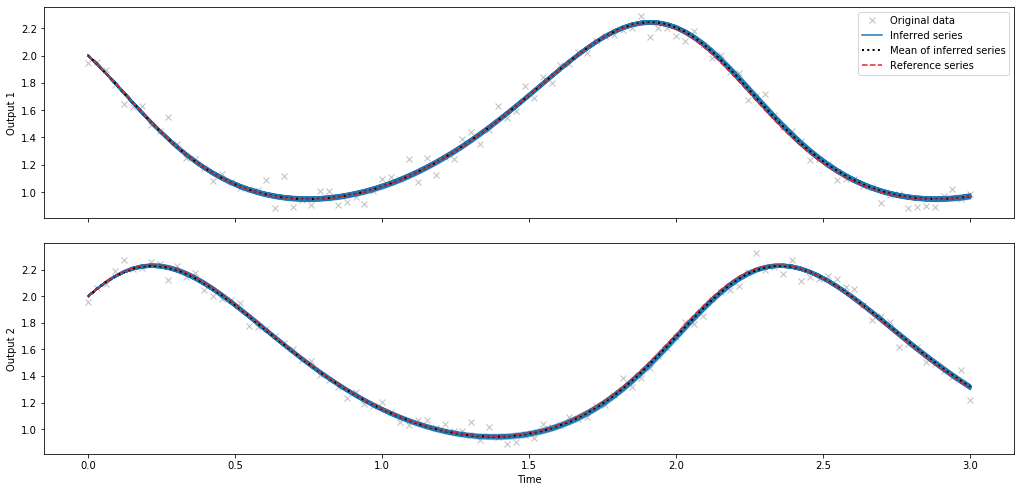

In [8]:
# Get the first MCMC chain
chain1 = chains[0]

# Cut off the burn-in samples
chain1 = chain1[2500:]

fig, ax = pints.plot.series(chain1, problem, ref_parameters=parameters)
fig.set_size_inches(15, 7.5)
plt.show()

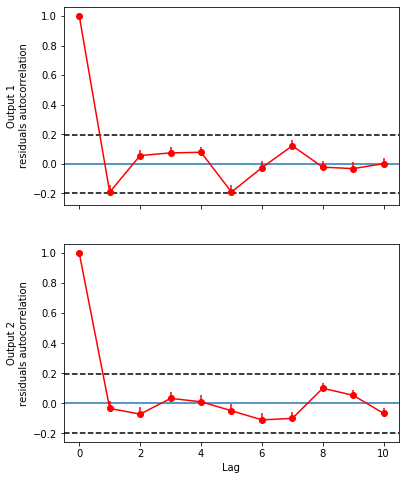

In [9]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(chain1, problem)

plt.show()

The `plot_residuals_autocorrelation` function generates one residuals plot for each output. Additionally, since Bayesian inference was performed and an MCMC chain was provided to the function, it draws a diagram of the distribution of the autocorrelations at each lag over the MCMC samples. Each dot indicates the median autocorrelation, and the bars show the extent of the 95% posterior interval.

In both outputs, no significant autocorrelation in the residuals is seen, as expected since independent Gaussian noise was used to generate the data.